In [1]:
# MSFR 경로 지정

import sys

sys.path.append('../..')

In [2]:
# MSFR 레이어 단일 모델

from torch import Tensor
from torch import device
import torch.nn as nn
from msfr import MSFR

dev = device('cpu')

class MSFRModel(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)

        self.msfr = MSFR(1, 1, device=dev)

    def forward(self, x: Tensor) -> Tensor:
        print(f"Shape of X: {x.shape}")
        result = self.msfr(x)
        print(f"Shape of result: {result.shape}")
        return result


In [3]:
# 샘플 데이터 생성

import random
from torch import Tensor
from torch import randint
from torch import sin

x_values = [random.uniform(0, 30) for _ in range(100)]
x_tensor = Tensor(x_values, device=dev).view(-1, 1)  # (50, 1) 형태로 변환
y_tensor = 10*sin(x_tensor) + (randint(-1, 2, x_tensor.shape).float() * 0.5)  # 약간의 노이즈 추가


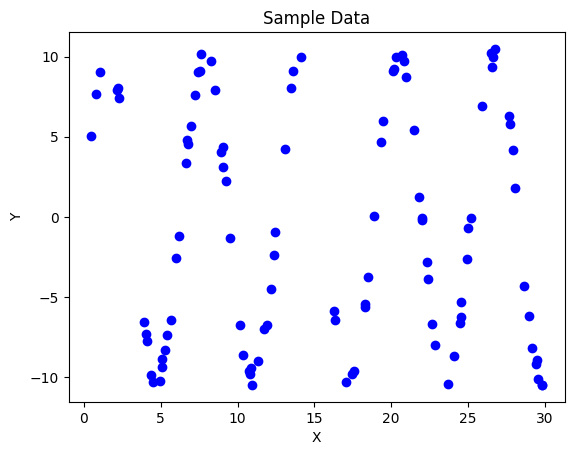

In [4]:
# 샘플 데이터 시각화

import matplotlib.pyplot as plt

plt.scatter(x_tensor.numpy(), y_tensor.numpy(), color='blue', label='Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sample Data')
plt.show()

In [11]:
# 모델 학습 및 출력 확인

from torch.optim import Adam
from torch.nn import MSELoss

model = MSFRModel()
optimizer = Adam(model.parameters(), lr=1)
loss_fn = MSELoss()

epochs = 40
for epoch in range(1, epochs + 1):
    output = model(x_tensor)
    loss = loss_fn(output, y_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch}, Loss: {loss.item()}")

Shape of X: torch.Size([100, 1])
Shape of result: torch.Size([100, 1])
Epoch 1, Loss: 60.28739929199219
Shape of X: torch.Size([100, 1])
Shape of result: torch.Size([100, 1])
Epoch 2, Loss: 52.642879486083984
Shape of X: torch.Size([100, 1])
Shape of result: torch.Size([100, 1])
Epoch 3, Loss: 67.78718566894531
Shape of X: torch.Size([100, 1])
Shape of result: torch.Size([100, 1])
Epoch 4, Loss: 54.864864349365234
Shape of X: torch.Size([100, 1])
Shape of result: torch.Size([100, 1])
Epoch 5, Loss: 33.188507080078125
Shape of X: torch.Size([100, 1])
Shape of result: torch.Size([100, 1])
Epoch 6, Loss: 24.801219940185547
Shape of X: torch.Size([100, 1])
Shape of result: torch.Size([100, 1])
Epoch 7, Loss: 22.56780242919922
Shape of X: torch.Size([100, 1])
Shape of result: torch.Size([100, 1])
Epoch 8, Loss: 14.796814918518066
Shape of X: torch.Size([100, 1])
Shape of result: torch.Size([100, 1])
Epoch 9, Loss: 9.546632766723633
Shape of X: torch.Size([100, 1])
Shape of result: torch.Siz

In [6]:
# 모델 학습 결과 출력

from torch import no_grad

with no_grad():
    predicted = model(x_tensor)
    print("Predicted values:", predicted.squeeze().numpy())

Shape of X: torch.Size([100, 1])
Shape of result: torch.Size([100, 1])
Predicted values: [ -8.069322    -9.7496395    9.025655    -9.625199   -10.011685
   6.1762605   10.125904    -7.6348767    8.1033535    9.764935
  -9.444976     9.432556   -10.051895    -8.522604   -10.048663
   8.140694     4.6504807   -1.1267306    1.552255    -3.4111104
  -5.943437    10.028931     6.6667557   -9.416604    -3.9384909
  -9.718271    -5.556241     1.80367     -1.9776644    3.958773
  -1.1363325    9.83192     -2.466234    -9.542527     2.5202315
  -8.935324     0.08286313  -9.433459    -5.3659687   10.009157
   5.79441      4.366053     7.451161     3.4321434   -4.1376734
 -10.051194    -4.00046     10.098794    -6.978212    -5.67361
  -0.2140817   -9.887785     5.1159396   -5.688263    -9.85809
   4.5986943    0.30919725  -3.7971156   -9.92086      8.078307
  -0.1017148    9.591012     4.4522805   -9.778421     8.6146755
 -10.050388    -6.3602924   -1.518775     9.843865    -9.56508
   7.9852614 

In [7]:
# 모델 파라미터 출력

bias = model.msfr.bias.detach().numpy()
cycle = model.msfr.cycle.detach().numpy()
weight = model.msfr.weight.detach().numpy()

print(f"Bias: {bias}")
print(f"Cycle: {cycle}")
print(f"Weight: {weight}")

Bias: [-0.06182037]
Cycle: [6.2967753]
Weight: [[10.12183    -0.07132661  0.02024683  0.2792117  -0.08629856  0.06228431]]


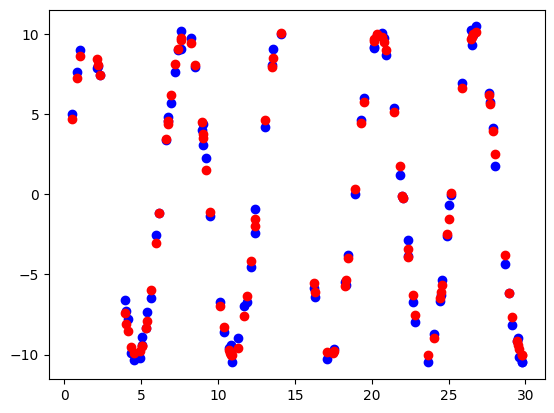

In [8]:
# 모델 학습 결과 시각화 및 비교

plt.scatter(x_tensor.numpy(), y_tensor.numpy(), color='blue', label='Data Points')
plt.scatter(x_tensor.numpy(), predicted.numpy(), color='red', label='MSFR Prediction')